> # 3 비지도 학습과 데이터 전처리(2)

- 전체 내용 최하단에 정리

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

%matplotlib inline

### 3.4.2 비음수 행렬 분해(NMF)

#### 인위적 데이터에 NMF 적용하기

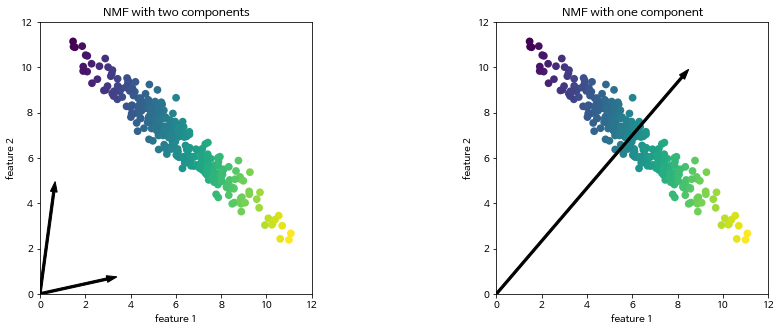

In [3]:
# NMF를 적용한 예시 
mglearn.plots.plot_nmf_illustration()

In [8]:
# NMF 사용 시 성분의 갯수가 주는 영향
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

In [9]:
# 데이터 편중을 없애기
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 픽셀 값을 0~1 스케일로 조정
X_people = X_people / 255

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

#### 얼굴 이미지에 NMF 적용하기

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
_____________________________________________________nmf_faces - 668.5s, 11.1min


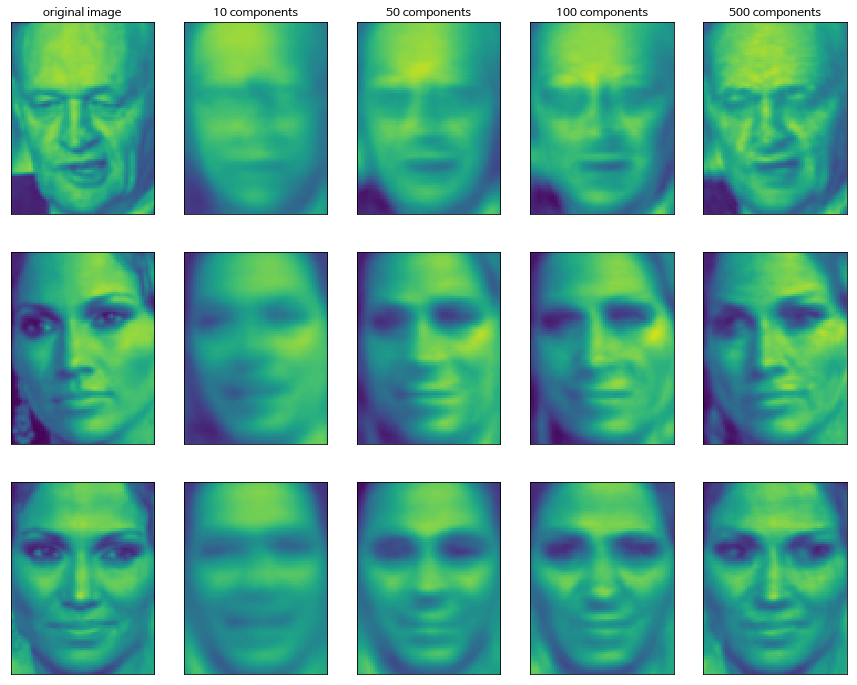

In [11]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

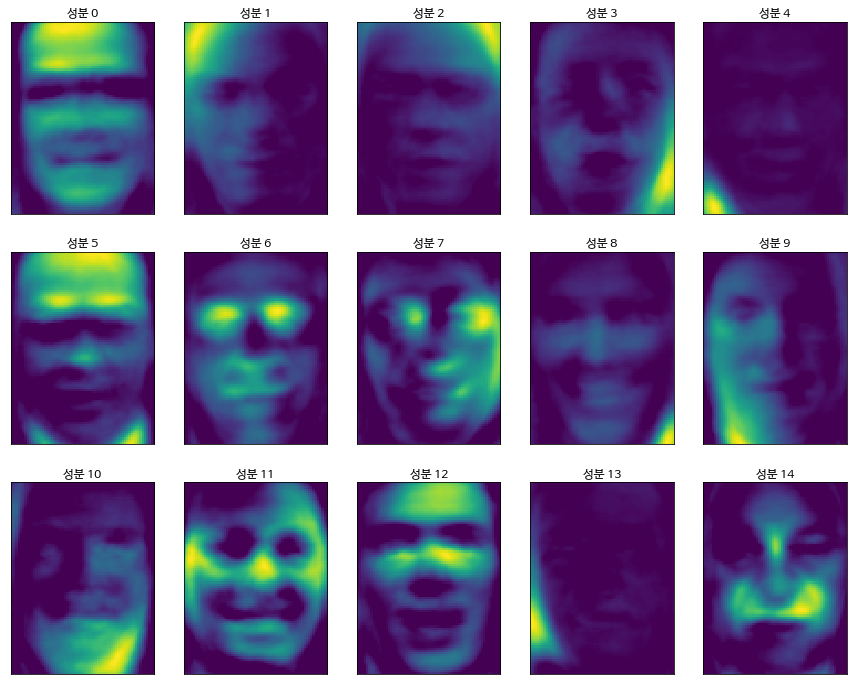

In [14]:
# 성분 15개만 추출
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                        subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))

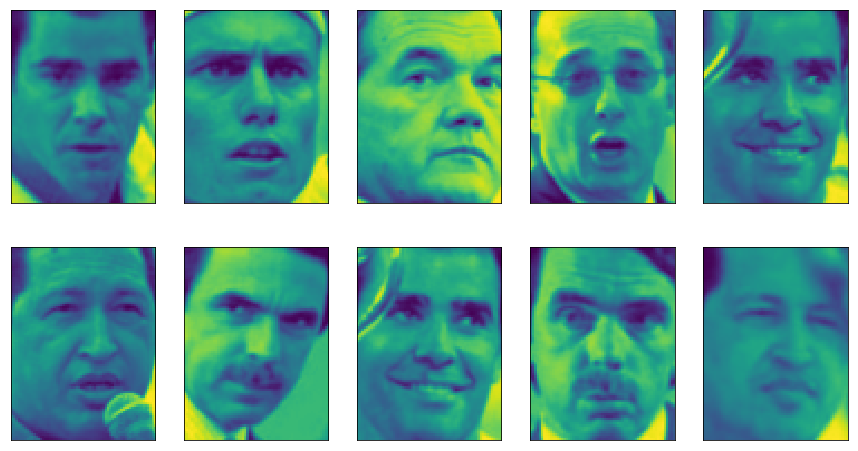

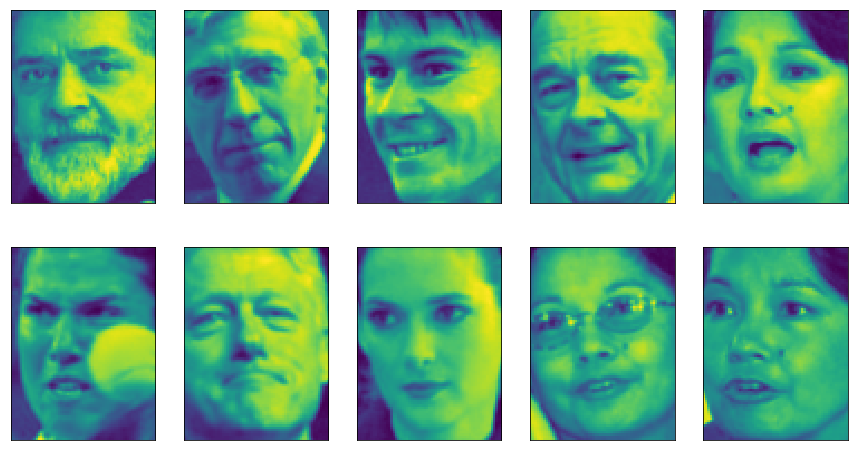

In [15]:
compn = 3
# 4번째 성분으로 정렬하여 처음 10개 이미지 출력
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7
# 8번째 성분으로 정렬하여 처음 10개 이미지 출력
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, '신호')

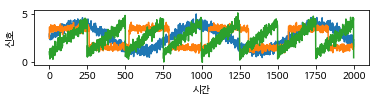

In [16]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("시간")
plt.ylabel("신호")

In [17]:
# 원본 데이터를 사용해 100개의 측정 데이터를 만듬
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("측정 데이터 형태: {}".format(X.shape))

측정 데이터 형태: (2000, 100)


In [18]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태: {}".format(S_.shape))

복원한 신호 데이터 형태: (2000, 3)


In [21]:
# PCA로도 만들어 봄
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)

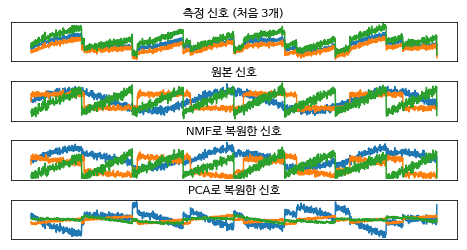

In [22]:
models = [X, S, S_, H]
names = ['측정 신호 (처음 3개)', '원본 신호',
        'NMF로 복원한 신호', 'PCA로 복원한 신호']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                        subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

### 3.4.3 t-SNE를 이용한 매니폴드 학습

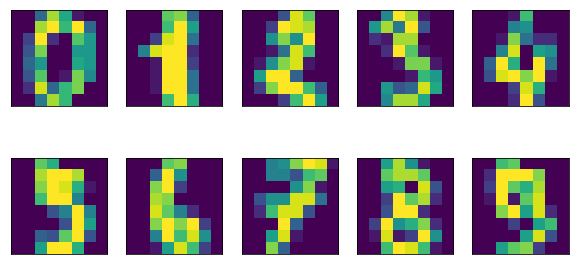

In [30]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                        subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, '두 번째 주성분')

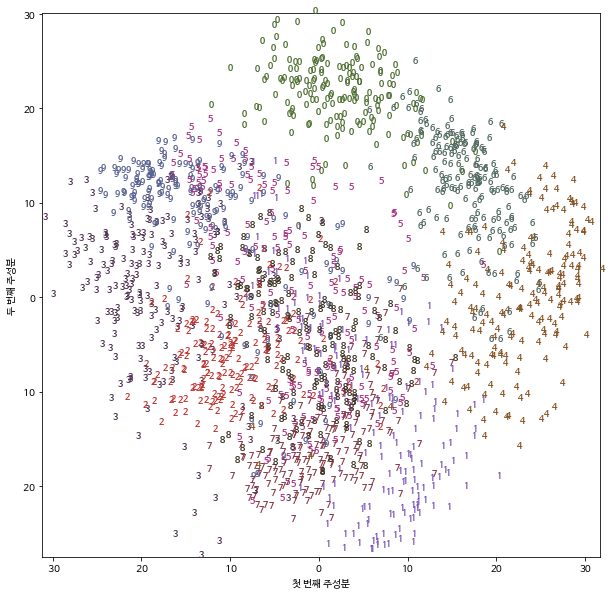

In [32]:
# PCA 모델 생성
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
         "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits_pca)):
    # 숫자 텍스트를 이용해 산점도 그림
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

Text(0, 0.5, 't-SNE 특성 1')

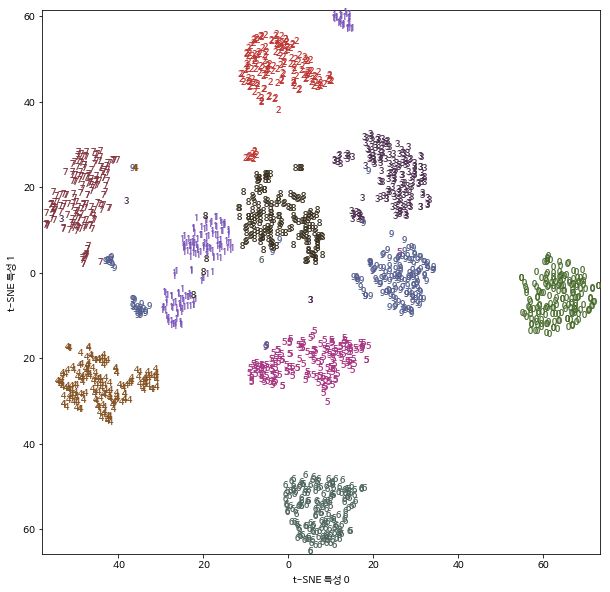

In [35]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# TSNE에는 transform 메서드가 없음
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")

## 3.4 차원 축소, 특성 추출, 매니폴드 학습

### 2) 비음수 행렬 분해(NMF)

① 특징
- 유용한 특성을 뽑아내기 위한 비지도 학습 알고리즘
- PCA와 비슷
- 음수가 아닌 성분과 계수 값을 찾음(데이터가 양수인지 확인)
- 모든 성분을 동등하게 취급
- NMF로 생성한 성분은 순서가 없음
- 성분이 많다면: 데이터의 각 특성의 끝에 위치한 포인트를 가리키는 방향
- 성분이 하나라면: 데이터를 가장 잘 표현할 수 있는 평균으로 방향

② 장단점
- 오디오 트랙 같이 독립된 소스를 추가하여 만들어진 데이터에 유용
- 데이터 인코딩, 재구성보다는, 유용한 패턴을 찾는 것이 주 목적

### 패턴 추출, 비슷한 알고리즘

- 독립 성분 분석(ICA)
- 요인 분석(FA)
- 희소 코딩(sparse coding, 딕셔너리 학슴)

### 3) t-SNE를 이용한 매니폴드 학습

① 특징
- 목적이 시각화라, 3개 이상의 특성을 뽑는 경우는 거의 없음
- 테스트로 적용은 X, 오직 트레이닝 데이터로 탐색적 데이터 분석

② 장단점
- 훨씬 복잡한 매핑을 만들어 PCA보다 더 나은 시각화 제공

③ t-SNE
- 데이터 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾음
- 원본 특성 공간에서 가까운 데이터는 가깝게 표현, 이웃 데이터의 정보 보존하려고 노력